# Telco Customer Churn Prediction

This project is part of the HyperionDev Data Science Capstone. The goal is to analyze customer data and build predictive models to determine which customers are likely to churn (i.e., stop using the service). This involves:

- Data inspection
- Data preprocessing
- Exploratory data analysis
- Building logistic regression and random forest models
- Evaluating and comparing model performance


In [64]:
# Data handling and preprocessing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Settings
import warnings
warnings.filterwarnings("ignore")  #  Suppress warnings for clean output

# Set Seaborn style
sns.set(style='whitegrid')


##  Load and Inspect the Dataset

We will now load the Telco Customer Churn dataset and perform a basic inspection to understand the structure and types of data we're dealing with.


In [65]:
# Load dataset with error handling
try:
    df = pd.read_csv("Telco-Customer-Churn.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Please make sure 'Telco-Customer-Churn.csv' is in the same directory.")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("Error parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Show the first 10 rows
print("\nFirst 10 rows of the dataset:")
display(df.head(10))

# Show column names
print("\n Column Names:")
print(df.columns.tolist())

# Show data types
print("\nData Types:")
print(df.dtypes)


Dataset loaded successfully!

First 10 rows of the dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No



 Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


##  Data Preprocessing (Part 1)

We will now clean and prepare the dataset:
- Convert the 'TotalCharges' column to numeric.
- Remove rows with missing values.
- Drop the 'customerID' column, as it doesn't contribute to prediction.


In [66]:
# Convert TotalCharges to numeric (with error handling for non-numeric values)
print(" Converting 'TotalCharges' to numeric...")
try:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")  # force invalid values to NaN
    print("Conversion successful.")
except Exception as e:
    print(f"Error converting TotalCharges: {e}")

# Drop rows with missing values (due to coercion)
print(f"Rows before dropping NAs: {df.shape[0]}")
df = df.dropna()
print(f"Rows after dropping NAs: {df.shape[0]}")

#  Drop customerID
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)
    print("customerID' column dropped.")

# Optional check: are there any missing values left?
print("Missing values per column:")
print(df.isnull().sum())


 Converting 'TotalCharges' to numeric...
Conversion successful.
Rows before dropping NAs: 7043
Rows after dropping NAs: 7032
customerID' column dropped.
Missing values per column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Step 4: Encode Target and Categorical Features

- Convert the 'Churn' column to binary values: Yes = 1, No = 0
- Convert categorical features into dummy variables using `pd.get_dummies()`
- We'll drop the first dummy category to avoid dummy variable trap


In [67]:
# Convert Churn column to binary
print("Converting 'Churn' column to binary...")
try:
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    print("Churn conversion successful.")
except Exception as e:
    print(f"Error converting 'Churn': {e}")

#  Get dummy variables for categorical features
print("Creating dummy variables for categorical features...")
try:
    # Identify categorical columns (object type)
    categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
    print(f"Categorical columns to encode: {categorical_cols}")

    # Create dummy variables, drop the first to avoid dummy trap
    telecom_cust_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    print("Dummy variables created successfully.")
except Exception as e:
    print(f"Error creating dummy variables: {e}")

#  preview
print("Data shape after dummy encoding:", telecom_cust_dummies.shape)
display(telecom_cust_dummies.head())


Converting 'Churn' column to binary...
Churn conversion successful.
Creating dummy variables for categorical features...
Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Dummy variables created successfully.
Data shape after dummy encoding: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


##  Exploratory Data Analysis (EDA)

Now we'll visualize key relationships and trends in the data:
- A correlation matrix to check relationships with the target
- A histogram to explore tenure distribution
- A scatter plot to view relationship between charges
- A boxplot to compare churn behavior based on tenure


 Correlation heatmap:


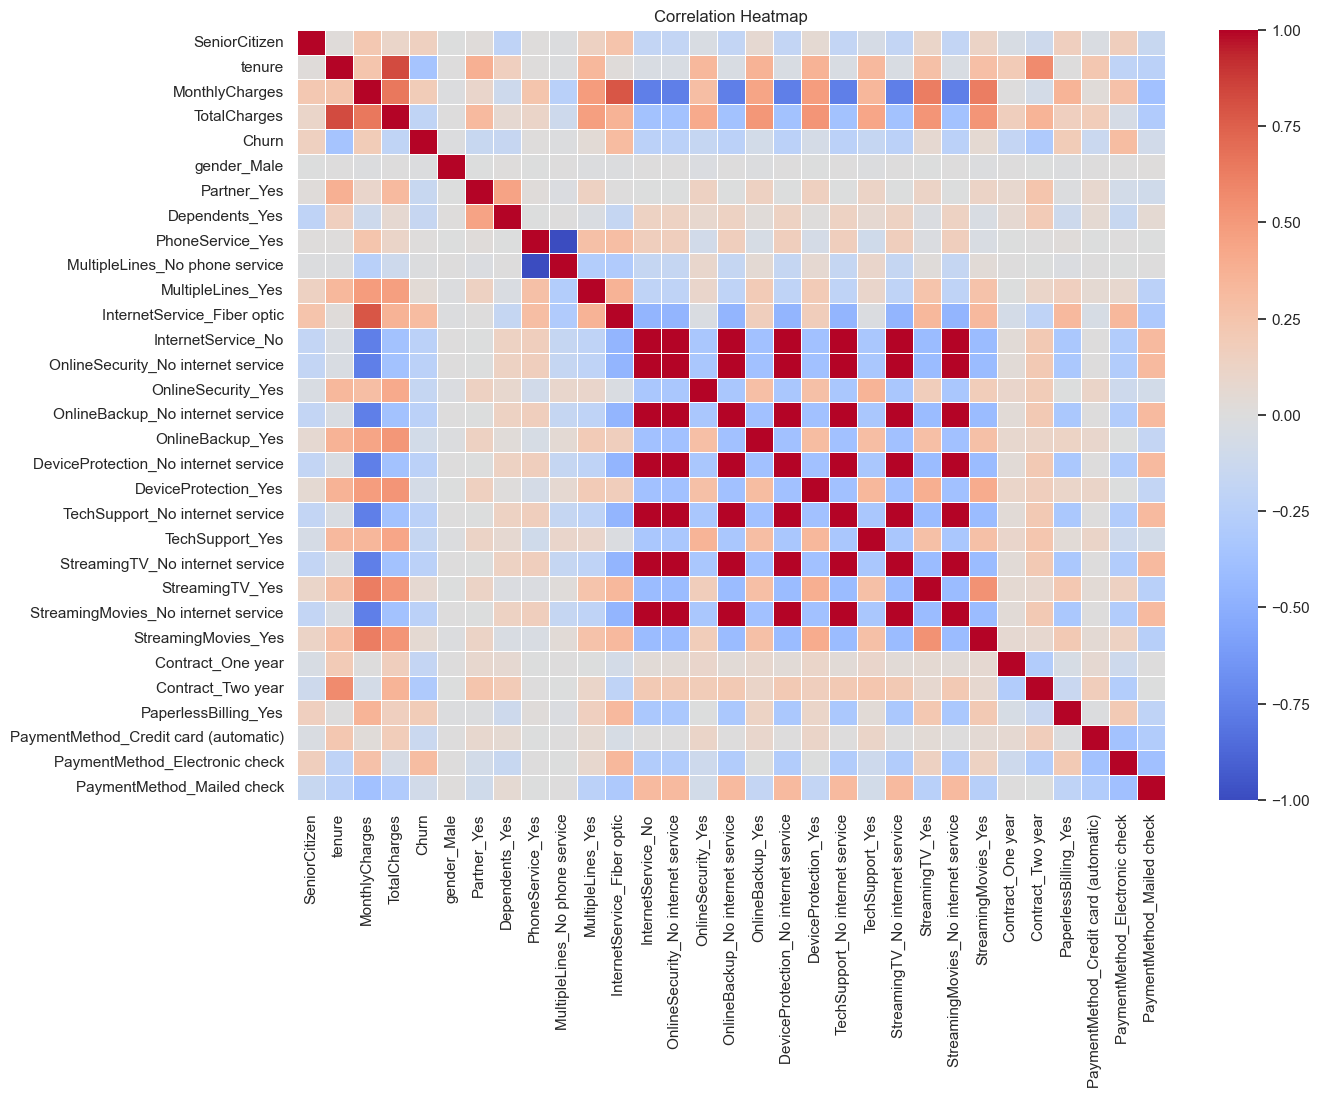

Tenure Distribution:


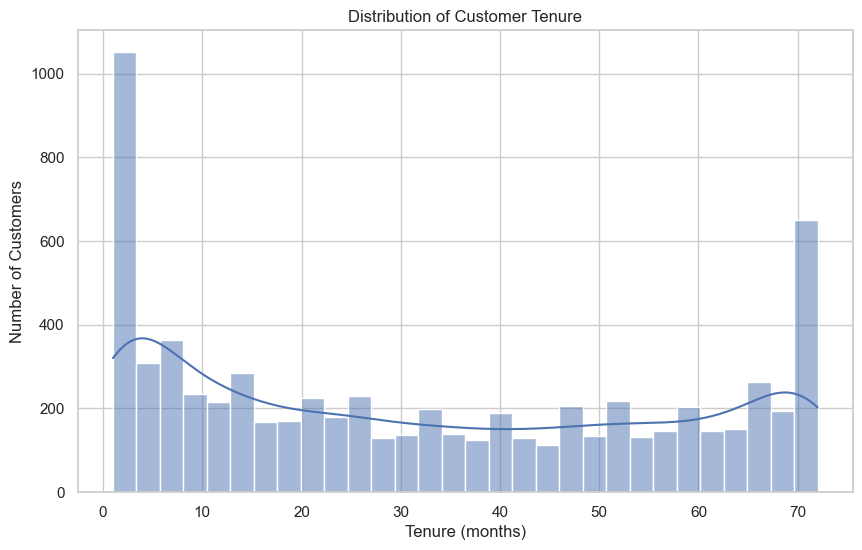

 MonthlyCharges vs. TotalCharges:


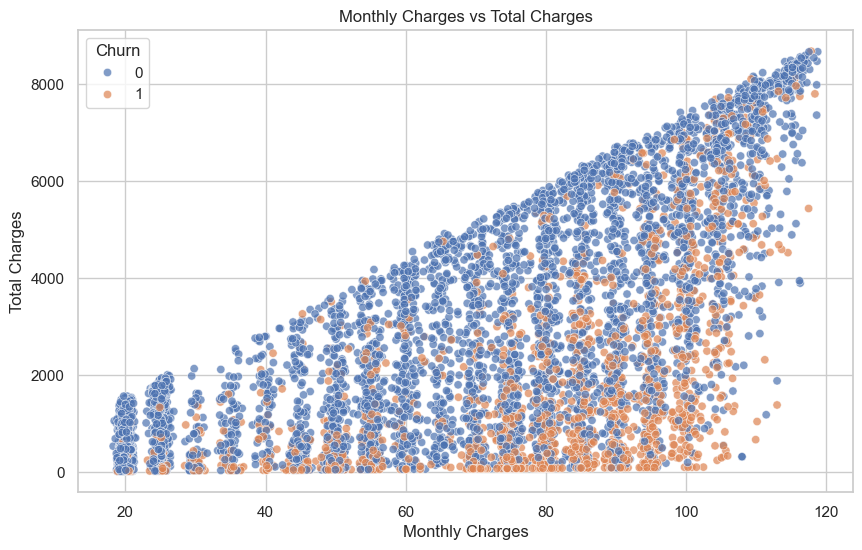

Boxplot: Tenure vs Churn


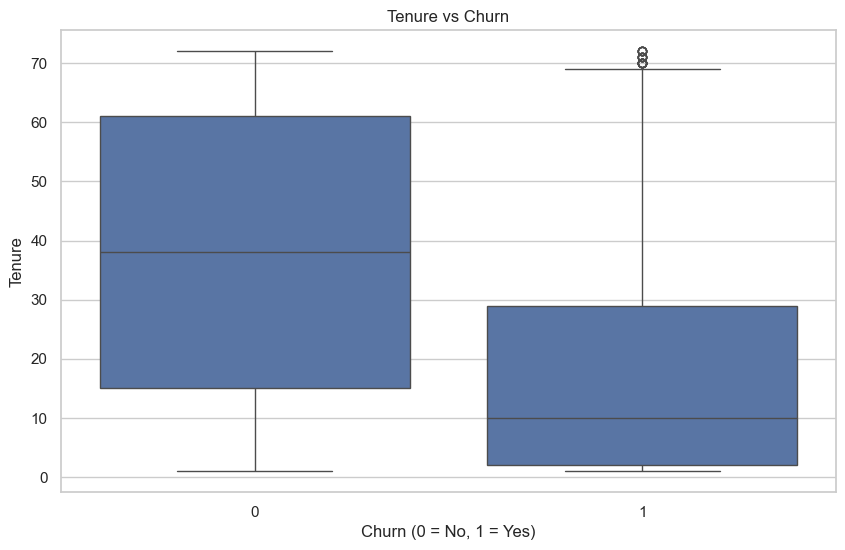

In [68]:

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Correlation Heatmap
print(" Correlation heatmap:")
plt.figure(figsize=(14, 10))
sns.heatmap(telecom_cust_dummies.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 2. Histogram of tenure
print("Tenure Distribution:")
plt.figure()
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()

# 3. Scatter plot: MonthlyCharges vs TotalCharges
print(" MonthlyCharges vs. TotalCharges:")
plt.figure()
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.7)
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.legend(title="Churn")
plt.show()

# 4. Boxplot: Tenure vs Churn
print("Boxplot: Tenure vs Churn")
plt.figure()
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure")
plt.show()


##  Exploratory Data Analysis (EDA) — Key Findings

###  Correlation Heatmap
- **Tenure** shows a **negative correlation** with `Churn`, suggesting that customers who stay longer are less likely to churn.
- `OnlineSecurity_No`, `TechSupport_No`, and short-term contracts (e.g., `Contract_Month-to-month`) correlate **positively with churn**.
- `TotalCharges` and `MonthlyCharges` are **strongly correlated** with each other, as expected.

###  Distribution of Tenure
- The histogram of `tenure` reveals a **bimodal distribution**:
  - Many customers are **very new** (0–10 months).
  - Another peak exists around **70+ months**, indicating long-term loyal customers.
- Newer customers seem more likely to churn.

### MonthlyCharges vs. TotalCharges
- There’s a **linear pattern**: higher monthly charges typically lead to higher total charges.
- However, many churned customers appear in the **lower range of TotalCharges** but have **high MonthlyCharges** — they likely churned early despite costly plans.

### Tenure vs. Churn (Boxplot)
- Churned customers tend to have **much lower tenure** compared to those who stayed.
- The median tenure for churners is significantly lower, with a narrower interquartile range.




## Data Scaling and Train-Test Split

To prepare the data for training machine learning models:
- We'll use Min-Max Scaling to bring all features to a uniform scale (0 to 1).
- Then, we'll split the dataset into training and test sets with a 75%-25% ratio.


In [69]:

# Define X and y
print("Splitting features and target...")
try:
    X = telecom_cust_dummies.drop("Churn", axis=1)
    y = telecom_cust_dummies["Churn"]
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
except Exception as e:
    print(f"Error splitting features and target: {e}")

# Min-Max Scaling
print("Applying Min-Max scaling...")
try:
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    print("Scaling successful.")
except Exception as e:
    print(f"Error during scaling: {e}")

#  Split into train and test sets
print("Splitting data into train and test sets (75% train, 25% test)...")
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.25, random_state=42, stratify=y
    )
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
except Exception as e:
    print(f"Error splitting train/test sets: {e}")


Splitting features and target...
Features shape: (7032, 30)
Target shape: (7032,)
Applying Min-Max scaling...
Scaling successful.
Splitting data into train and test sets (75% train, 25% test)...
Training set: (5274, 30), Test set: (1758, 30)


## Logistic Regression Model

We'll now build a logistic regression model:
- Train the model on the training set
- Predict on the test set
- Evaluate the model using accuracy score


In [70]:

#  Train Logistic Regression
print("Training Logistic Regression model...")
try:
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)
    print("Logistic Regression training complete.")
except Exception as e:
    print(f"Error during model training: {e}")

# Predict on test data
print("Making predictions on test data...")
try:
    y_pred_logreg = log_reg.predict(X_test)
    print("Prediction complete.")
except Exception as e:
    print(f"Error during prediction: {e}")

# valuate accuracy
print("Evaluating accuracy:")
try:
    logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
    print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
except Exception as e:
    print(f"Error calculating accuracy: {e}")


Training Logistic Regression model...
Logistic Regression training complete.
Making predictions on test data...
Prediction complete.
Evaluating accuracy:
Logistic Regression Accuracy: 0.8060


## Random Forest Model

We'll now build a Random Forest Classifier with the following hyperparameters:
- 2000 decision trees (`n_estimators`)
- Out-of-bag error estimation enabled (`oob_score`)
- Use a square root of total features when splitting (`max_features="sqrt"`)
- Limit each tree to a maximum of 50 leaf nodes (`max_leaf_nodes`)
- Bootstrapping enabled


In [71]:

#  Build the model with specified parameters
print("Training Random Forest Classifier...")
try:
    rf_clf = RandomForestClassifier(
        n_estimators=2000,
        oob_score=True,
        max_features="sqrt",
        max_leaf_nodes=50,
        bootstrap=True,
        random_state=42,
        n_jobs=-1  # use all CPU cores
    )
    rf_clf.fit(X_train, y_train)
    print("Random Forest training complete.")
except Exception as e:
    print(f"Error training Random Forest: {e}")

# Make predictions
print("Making predictions with Random Forest...")
try:
    y_pred_rf = rf_clf.predict(X_test)
    print("Prediction complete.")
except Exception as e:
    print(f"Error during RF prediction: {e}")

#  Accuracy score
print("Evaluating accuracy:")
try:
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
except Exception as e:
    print(f"Error calculating accuracy: {e}")

#  OOB error
print("Out-of-Bag (OOB) Error Estimate:")
try:
    oob_error = 1 - rf_clf.oob_score_
    print(f"OOB Error Estimate: {oob_error:.4f}")
except Exception as e:
    print(f"Error calculating OOB score: {e}")


Training Random Forest Classifier...
Random Forest training complete.
Making predictions with Random Forest...
Prediction complete.
Evaluating accuracy:
Random Forest Accuracy: 0.7918
Out-of-Bag (OOB) Error Estimate:
OOB Error Estimate: 0.2008


##  Enhanced Model Evaluation

We will evaluate both models further using:
- **Confusion matrix** to analyze correct vs incorrect predictions
- **Precision** to measure the quality of positive predictions
- **Recall** to measure how well the model identifies actual churners

This helps us understand the trade-off between false positives and false negatives — critical in churn prediction.


Confusion Matrix: Logistic Regression


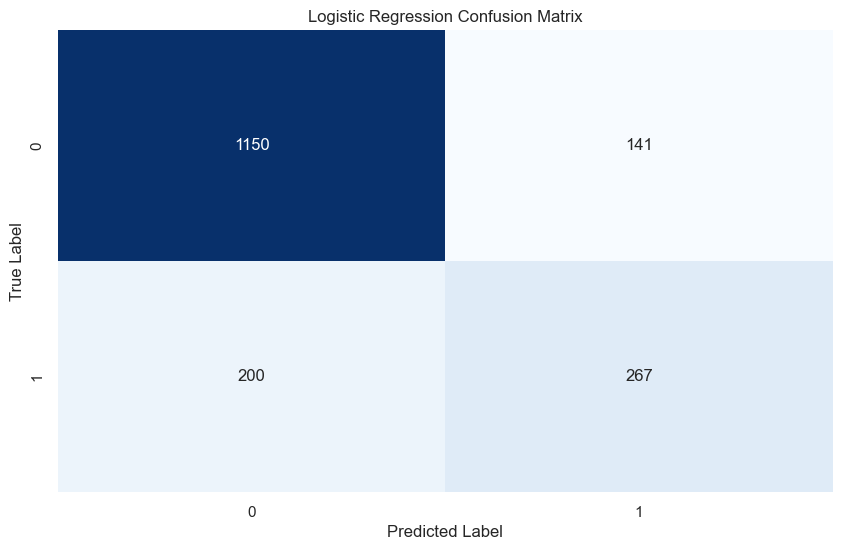

Confusion Matrix: Random Forest


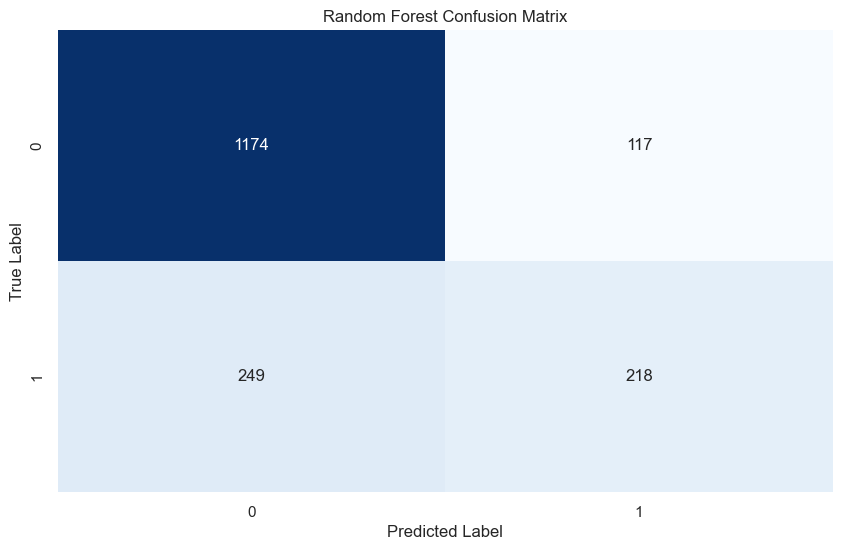

Precision & Recall Scores:
Logistic Regression - Precision: 0.6544, Recall: 0.5717
Random Forest       - Precision: 0.6507, Recall: 0.4668


In [72]:

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Confusion Matrix - Logistic Regression
print("Confusion Matrix: Logistic Regression")
plot_conf_matrix(y_test, y_pred_logreg, "Logistic Regression Confusion Matrix")

# Confusion Matrix - Random Forest
print("Confusion Matrix: Random Forest")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

# Precision & Recall
print("Precision & Recall Scores:")
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

print(f"Logistic Regression - Precision: {logreg_precision:.4f}, Recall: {logreg_recall:.4f}")
print(f"Random Forest       - Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}")


## Model Comparison and Conclusion

### Logistic Regression
- Accuracy: **80.6%**
- Precision: **0.6544**
- Recall: **0.5717**
- Better at identifying actual churners (higher recall)
- More false positives than Random Forest

### Random Forest Classifier
- Accuracy: **79.2%**
- Precision: **0.6507**
- Recall: **0.4668**
- Fewer false positives
- Missed more actual churners (lower recall)
- OOB Error Estimate: **20.08%**

### Conclusion:
While both models perform well, **Logistic Regression is more suitable for this churn prediction task** because it captures more actual churn cases — which is crucial in customer retention. The slightly higher recall makes it a better fit when **missing a churner is costlier than targeting a non-churner**.


